In [3]:
# To do list:
# - Load IR x-axis
# - Load VI x-axis
# - Analyze if there is a trend in IR x-axis
# - Analyze if there is a trend in VI x-axis

import os, pickle, warnings, csv

from cv2 import imread, IMREAD_UNCHANGED
from scipy import interpolate
from io import StringIO
#from ipywidgets import interact
#from __future__ import print_function
#from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pylab as plt
import ipywidgets as widgets

warnings.filterwarnings('ignore')

In [2]:
# Load infrared frame
def _load_infrared(file): 
    return imread(file, IMREAD_UNCHANGED)

def _browse_samples(X_, Y_):

    def __view_samples(idx_):
        #print(X_[idx_][1])
        #print(Y_[idx_][1])
#         plt.figure(figsize = (20, 5))
#         plt.subplot(121)
#         plt.imshow(np.log(X_[idx_][0]))
#         plt.colorbar()
#         plt.subplot(122)
#         plt.imshow(np.log(Y_[idx_][0]))
#         plt.colorbar()
#         plt.show()
        
#         plt.figure(figsize = (20, 5))
#         plt.subplot(121)
#         plt.plot(X_[idx_][0][:, 0])
#         plt.plot(X_[idx_][0][:, 79])
#         plt.subplot(122)
#         plt.plot(X_[idx_][0][0, :])
#         plt.plot(X_[idx_][0][59, :])
#         plt.show()
        
        fig = plt.figure(figsize = (20, 10))
        ax = fig.gca(projection = '3d')
        ax.plot_surface(XX_, YY_, X_[idx_][0])
        plt.show()

        
    interact(__view_samples, idx_ = (0, len(X_) - 1)) 

XX_, YY_ = np.meshgrid(np.linspace(0, 79, 80), np.linspace(0, 59, 60))

path = r'C:\Users\Guille\Desktop\girasol_project\images'

X_ = []
Y_ = []
for file_ in os.listdir(path):
    if file_[-6:-4] == 'IR':
        x_ = _load_infrared('{}\{}'.format(path, file_))
        X_.append([x_, file_])
    if file_[-6:-4] == 'VI':
        y_ = _load_infrared('{}\{}'.format(path, file_))
        Y_.append([y_, file_])
             
_browse_samples(X_, Y_)

interactive(children=(IntSlider(value=710, description='idx_', max=1420), Output()), _dom_classes=('widget-interact',))

In [10]:
# Load numpy-matrix in a csv file
def _load_csv_file(path):
    return np.loadtxt(open(path, "rb"), delimiter = ",")
    
path = r'C:\Users\Guille\Desktop\girasol_project\samples'

X_ = []
for file in os.listdir(path):
    print(file)
    x_ = _load_csv_file(r'{}\{}'.format(path, file))
    X_.append(x_)
    
IR_ = X_[0]
TR_ = X_[1]
VI_ = X_[2]
print(IR_.shape, TR_.shape, VI_.shape)

IR.csv


ValueError: could not convert string to float: 

In [23]:
# Load python-list in a csv file
def _load_csv_file(path):
    X_ = []
    with open(path) as csv_file:
        for row_ in csv.reader(csv_file, delimiter = ','):
            X_.append(row_)
    return X_

# transform the list to a numpy-matrix
def _list_to_matrix(X_):
    Y_ = np.zeros(((len(X_) - 1) // 3, 3))
    ii = 0
    for i in range(0, len(X_) - 1, 3):
        Y_[ii, :] = X_[i:i + 3]
        ii += 1
    return Y_
    
    
path = r'C:\Users\Guille\Desktop\girasol_project\samples'

X_ = []
for file in os.listdir(path):
    print(file)
    x_ = _load_csv_file(r'{}\{}'.format(path, file))[0]
    x_ = _list_to_matrix(x_)
    X_.append(x_)
    
IR_ = X_[0]
TR_ = X_[1]
VI_ = X_[2]
print(IR_.shape, TR_.shape, VI_.shape)

IR.csv
TR.csv
VI.csv
(1784, 3) (1784, 3) (1784, 3)


[[ 1058.  -602.]
 [ 1057.  -601.]
 [ 1056.  -601.]
 ...
 [-1056.  -600.]
 [-1057.  -601.]
 [-1058.  -602.]]
(1784, 3) (1784, 2)
(3, 2)
(1784, 2)


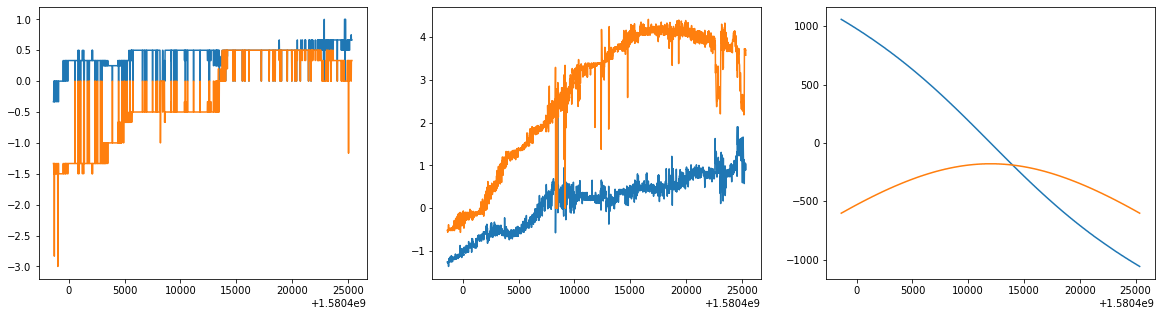

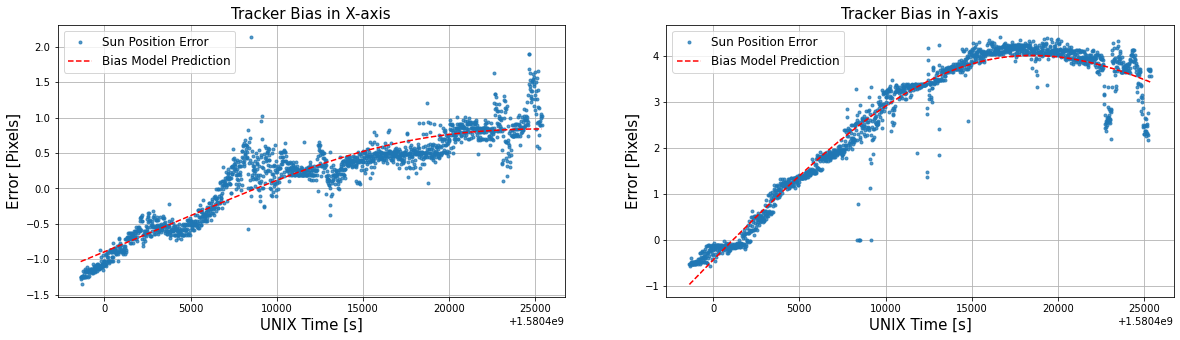

[[-8.85083025e-04 -2.07776488e-03]
 [ 9.22477789e-04  5.02923146e-03]
 [ 4.58581502e-01  4.26209280e+00]]


In [30]:
def _linear(X_, y_): return np.linalg.pinv(X_.T @ X_) @ (X_.T @ y_)

def _predict(x_, W_): return x_ @ W_

x_ = TR_[:, :-1]
print(x_)

b_ = np.ones((x_.shape[0], 1))
X_ = np.concatenate((x_, b_), axis = 1)
Y_ = VI_[:, :-1]
print(X_.shape, Y_.shape)

W_ = _linear(X_, Y_)
print(W_.shape)

Y_hat_ = _predict(X_, W_)
print(Y_hat_.shape)


plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.plot(IR_[:, 2], IR_[:, 0])
plt.plot(IR_[:, 2], IR_[:, 1])
plt.subplot(132)
plt.plot(VI_[:, 2], VI_[:, 0])
plt.plot(VI_[:, 2], VI_[:, 1])
plt.subplot(133)
plt.plot(TR_[:, 2], TR_[:, 0])
plt.plot(TR_[:, 2], TR_[:, 1])
plt.show()

plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Tracker Bias in X-axis', fontsize = 15)
plt.plot(VI_[:, 2], VI_[:, 0], '.', alpha = 0.75, label = 'Sun Position Error')
plt.plot(VI_[:, 2], Y_hat_[:, 0], '--', color = 'r', label = 'Bias Model Prediction')
plt.xlabel('UNIX Time [s]', fontsize = 15)
plt.ylabel('Error [Pixels]', fontsize = 15)
plt.legend(fontsize=12)
plt.grid()
plt.subplot(122)
plt.title('Tracker Bias in Y-axis', fontsize = 15)
plt.plot(VI_[:, 2], VI_[:, 1], '.', alpha = 0.75, label = 'Sun Position Error')
plt.plot(VI_[:, 2], Y_hat_[:, 1], '--', color = 'r', label = 'Bias Model Prediction')
plt.xlabel('UNIX Time [s]', fontsize = 15)
plt.ylabel('Error [Pixels]', fontsize = 15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

print(W_)

In [89]:
W_ = np.matrix([[-8.85083025e-04,-2.07776488e-03], [ 9.22477789e-04, 5.02923146e-03], [ 4.58581502e-01, 4.26209280e+00]])
print(W_.shape)

a = 1
b = 2

x_ = np.array((a, b, 1))
print(x_.shape)
print(x_)

y_ = np.squeeze(np.matmul(W_.T, x_))
print(y_.shape)
print(y_)

(3, 2)
(3,)
[1 2 1]
(1, 2)
[[0.45954137 4.2700735 ]]


In [ ]:
print(X_IR_x_)
X_, x_, y_ = _dataset(X_IR_x_, var_x = 0, var_y = 1)
beta_  = _linear(X_, y_)
y_hat_ = _predict(X_, beta_) #+ beta_[1]
print(beta_)

plt.figure()
plt.subplot(121)
plt.plot(X_IR_x_[:, 0], X_IR_x_[:, 1])
plt.plot(X_IR_x_[:, 0], X_IR_x_[:, 1], '.')
plt.plot(x_, y_hat_)
plt.subplot(122)
plt.plot(X_IR_x_[:, 2], X_IR_x_[:, 1])
plt.plot(X_IR_x_[:, 2], X_IR_x_[:, 1], '.')
plt.show()

alpha = 0.625 # angles per pixel
rho   = 115.7085 # steps per pixel
rho = 14.95
plt.figure()
plt.plot(x_, y_hat_ * rho)
plt.show()

In [60]:
print(X_IR_y_)
X_, x_, y_ = _dataset(X_IR_y_, var_x = 3, var_y = 0)
beta_  = _linear(X_, y_)
y_hat_ = _predict(X_, beta_) #- beta_[1]
print(beta_)

plt.figure()
plt.subplot(121)
plt.plot(X_IR_y_[:, 0], X_IR_y_[:, 1])
plt.plot(X_IR_y_[:, 0], X_IR_y_[:, 1], '.')
plt.subplot(122)
plt.plot(X_IR_y_[:, 3], X_IR_y_[:, 0])
plt.plot(X_IR_y_[:, 3], X_IR_y_[:, 0], '.')
plt.plot(x_, y_hat_)
plt.show()

alpha = 0.625 # angles per pixel
rho   = 115.7085 # steps per pixel
rho = 14.96
plt.figure()
plt.plot(x_, y_hat_ * rho)
plt.show()

NameError: name '_dataset' is not defined

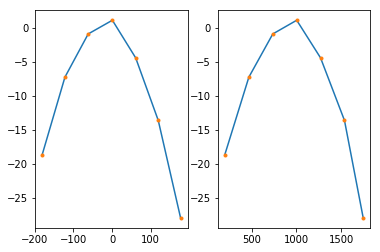

1746.0 202.0 -28.0 -18.65573770491804
-0.006051983351737022 7.20900378514397


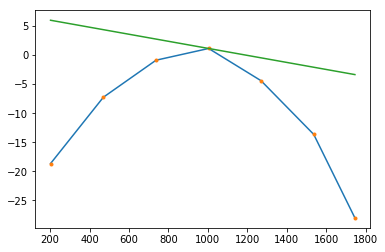

In [91]:
def _predict(x_, alpha, beta):
    return alpha * x_ + beta

plt.figure()
plt.subplot(121)
plt.plot(X_VI_x_[:7, 0], X_VI_x_[:7, 1])
plt.plot(X_VI_x_[:7, 0], X_VI_x_[:7, 1], '.')
plt.subplot(122)
plt.plot(X_VI_x_[:7, 2], X_VI_x_[:7, 1])
plt.plot(X_VI_x_[:7, 2], X_VI_x_[:7, 1], '.')
plt.show()

x_1 = X_VI_x_[0, 2]
x_2 = X_VI_x_[6, 2]
y_1 = X_VI_x_[0, 1]
y_2 = X_VI_x_[6, 1]
print(x_1, x_2, y_1, y_2)

alpha = (y_1 - y_2)/(x_1 - x_2)
x_ = X_VI_x_[:7, 2]
y_ = X_VI_x_[:7, 1]
            
y_hat_ = _predict(x_, alpha, 0)
z_ = y_ - y_hat_
beta = z_[3]
print(alpha, beta)
x_star = np.linspace(-1000, 2000, 10)
y_hat_ = _predict(x_, alpha, beta)

plt.figure()
plt.plot(X_VI_x_[:7, 2], X_VI_x_[:7, 1])
plt.plot(X_VI_x_[:7, 2], X_VI_x_[:7, 1], '.')
plt.plot(x_, y_hat_)
plt.show()

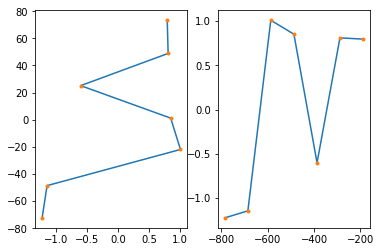

-188.0 -1.2264150943396146 0.7962962962963047 -1.2264150943396146
1.717794115996997
0.003382460519458059 1.425


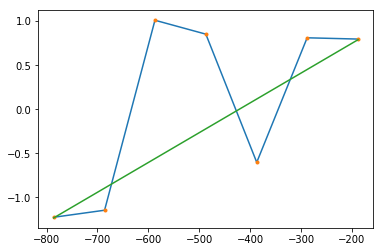

In [89]:
def _predict(x_, alpha, beta):
    return alpha * x_ + beta

plt.figure()
plt.subplot(121)
plt.plot(X_VI_y_[:7, 0], X_VI_y_[:7, 1])
plt.plot(X_VI_y_[:7, 0], X_VI_y_[:7, 1], '.')
plt.subplot(122)
plt.plot(X_VI_y_[:7, 3], X_VI_y_[:7, 0])
plt.plot(X_VI_y_[:7, 3], X_VI_y_[:7, 0], '.')
plt.show()

x_1 = X_VI_y_[0, 3]
x_2 = X_VI_y_[6, 3]
y_1 = X_VI_y_[0, 0]
y_2 = X_VI_y_[6, 0]
print(x_1, y_2, y_1, y_2)

alpha = (y_1 - y_2)/(x_1 - x_2)

x_ = X_VI_y_[:7, 3]
y_ = X_VI_y_[:7, 0]
y_hat_ = _predict(x_, alpha, 0)
z_ = y_ - y_hat_
print(np.mean(z_))
beta = 1.425 #/2
print(alpha, beta)
x_star_ = np.linspace(-500, 500, 10)
y_hat_ = _predict(x_, alpha, beta)

plt.figure()
plt.plot(X_VI_y_[:7, 3], X_VI_y_[:7, 0])
plt.plot(X_VI_y_[:7, 3], X_VI_y_[:7, 0], '.')
plt.plot(x_, y_hat_)
plt.show()

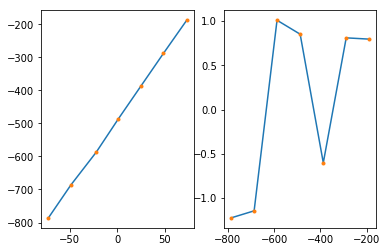

73.31481481481484 -786.0 -188.0 -786.0
4.105076070296965 -491.8398367677042


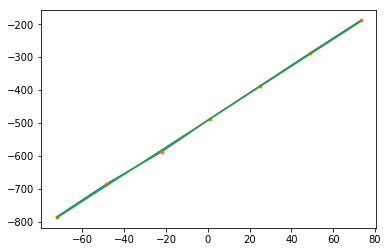

4.105076070296965


In [97]:
plt.figure()
plt.subplot(121)
plt.plot(X_VI_y_[:7, 1], X_VI_y_[:7, 3])
plt.plot(X_VI_y_[:7, 1], X_VI_y_[:7, 3], '.')
plt.subplot(122)
plt.plot(X_VI_y_[:7, 3], X_VI_y_[:7, 0])
plt.plot(X_VI_y_[:7, 3], X_VI_y_[:7, 0], '.')
plt.show()


x_1 = X_VI_y_[0, 1]
x_2 = X_VI_y_[6, 1]
y_1 = X_VI_y_[0, 3]
y_2 = X_VI_y_[6, 3]
print(x_1, y_2, y_1, y_2)

alpha = (y_1 - y_2)/(x_1 - x_2)

x_ = X_VI_y_[:7, 1]
y_ = X_VI_y_[:7, 3]
y_hat_ = _predict(x_, alpha, 0)
z_ = y_ - y_hat_
beta = z_[3]
print(alpha, beta)
x_star_ = np.linspace(-500, 500, 10)
y_hat_ = _predict(x_, alpha, beta)


plt.figure()
plt.plot(X_VI_y_[:7, 1], X_VI_y_[:7, 3])
plt.plot(X_VI_y_[:7, 1], X_VI_y_[:7, 3], '.')
plt.plot(x_, y_hat_)
plt.show()

rho = 4.105076070296965
print(rho)